In [1]:
from matplotlib import pylab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,6

In [2]:
df=pd.read_csv('/content/AirPassengers.csv')

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
df['Month']=pd.to_datetime(df['Month'])

In [6]:
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [7]:
df.index

RangeIndex(start=0, stop=144, step=1)

In [8]:
ts=df.copy()

In [9]:
from datetime import datetime

indexed_ts_df = ts.set_index('Month')

print(indexed_ts_df.loc[datetime(1949, 1, 1)])


#Passengers    112
Name: 1949-01-01 00:00:00, dtype: int64


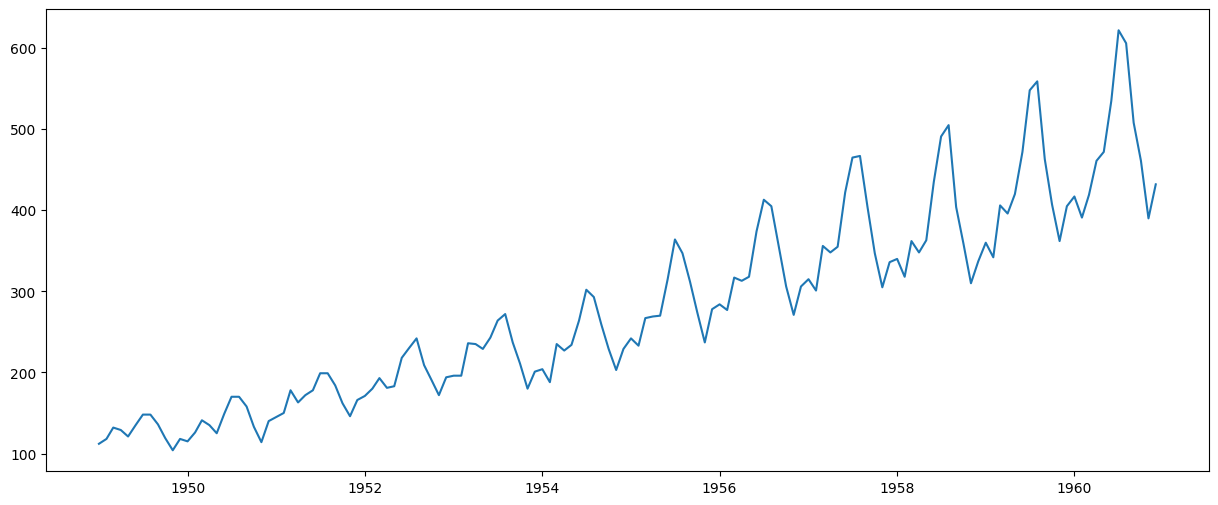

In [10]:
plt.plot(indexed_ts_df)


# Stationarity Test

In [12]:
from numpy._core.fromnumeric import mean
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean=pd.Series(timeseries).rolling(window=12).mean()
    rolstd=pd.Series(timeseries).rolling(window=12).std()

    orig=plt.plot(timeseries,color='blue',label='Original')
    mean=plt.plot(rolmean,color='red',label='Rolling Mean')
    std=plt.plot(rolstd,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    print('Results of Dickey-Fuller Test:')
    dftest=adfuller(timeseries,autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print(dfoutput)

In [15]:
indexed_ts_df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


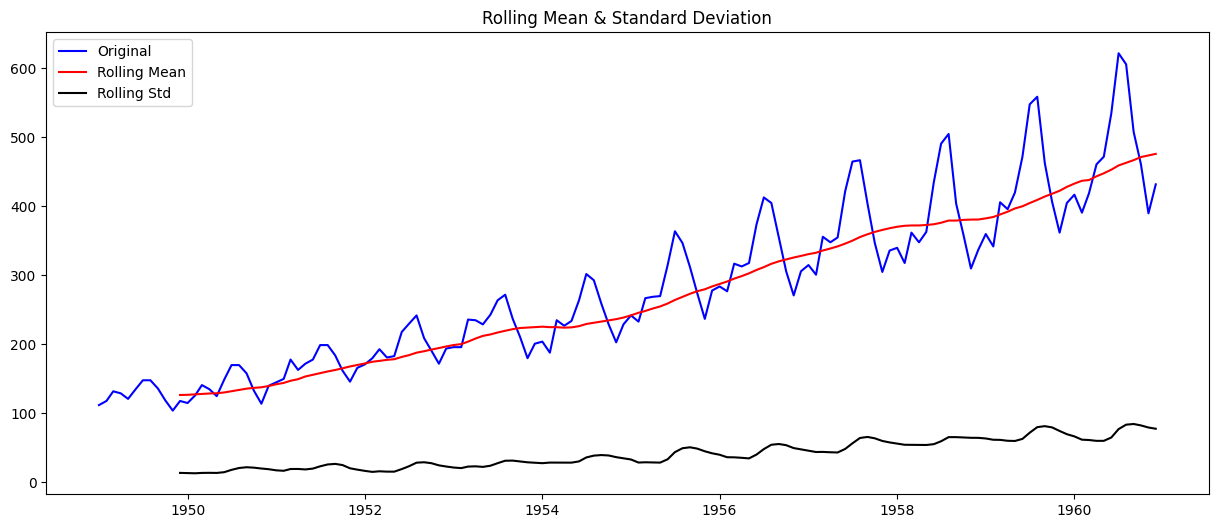

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [19]:
test_stationarity(indexed_ts_df['#Passengers'])

## Making TS stationary

In [20]:
indexed_ts_df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [21]:
indexed_ts_df_log=np.log(indexed_ts_df)

In [22]:
indexed_ts_df_log.head()

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


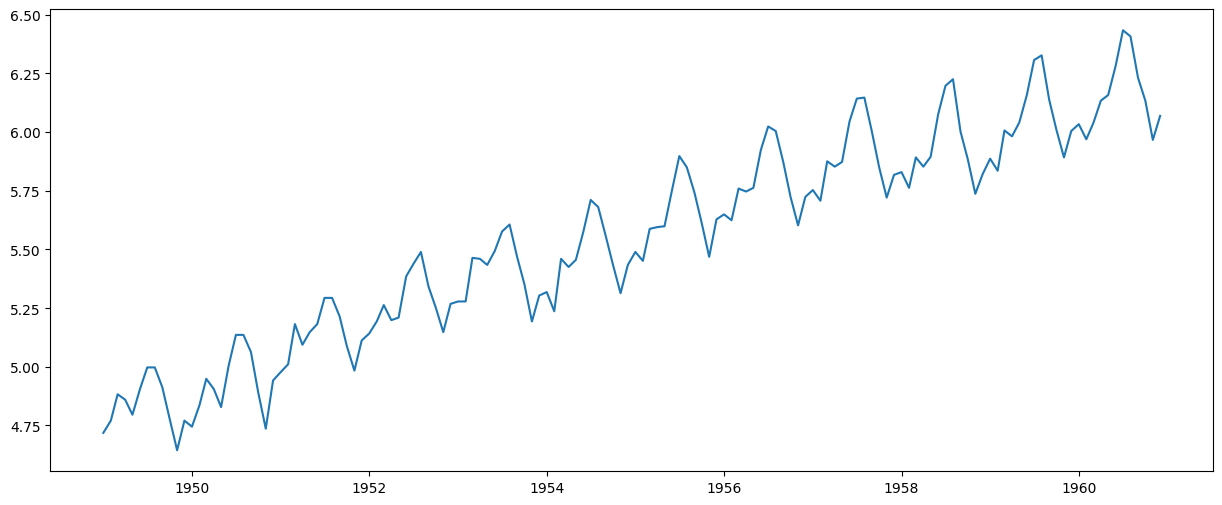

In [23]:
plt.plot(indexed_ts_df_log)

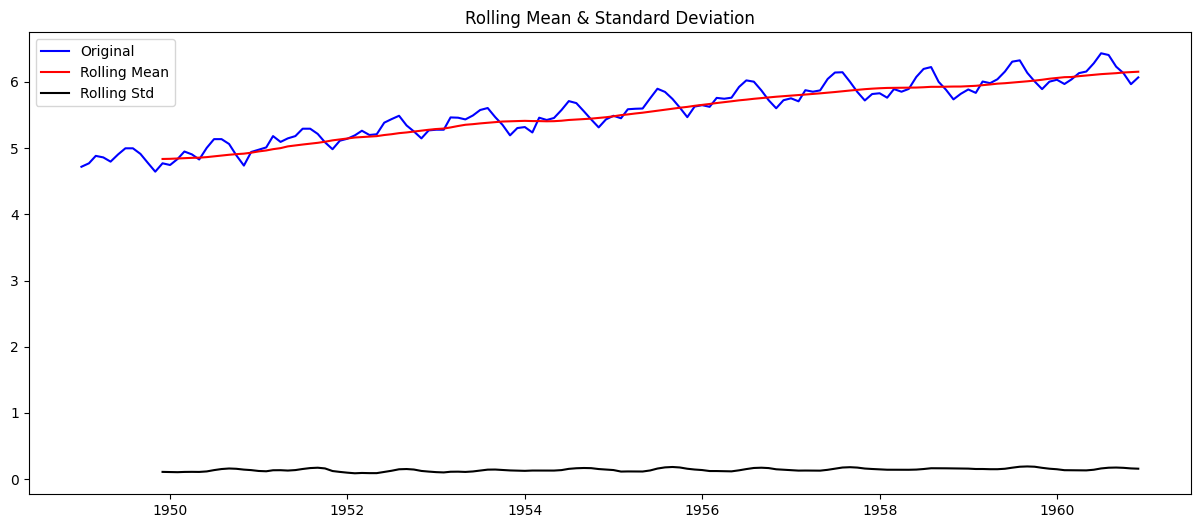

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [25]:
test_stationarity(indexed_ts_df_log['#Passengers'])

In [26]:
ts_double_log=np.log(indexed_ts_df_log)

In [28]:
ts_double_log.head()

,#Passengers
Month,
1949-01-01,1.551491
1949-02-01,1.562490
1949-03-01,1.585719
1949-04-01,1.581000
1949-05-01,1.567739


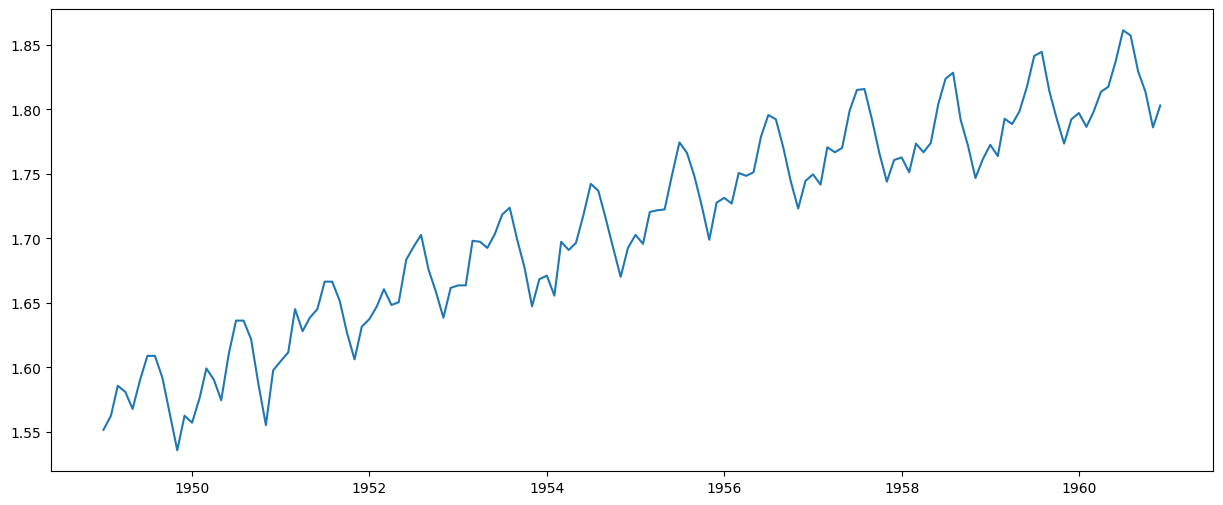

In [29]:
plt.plot(ts_double_log)

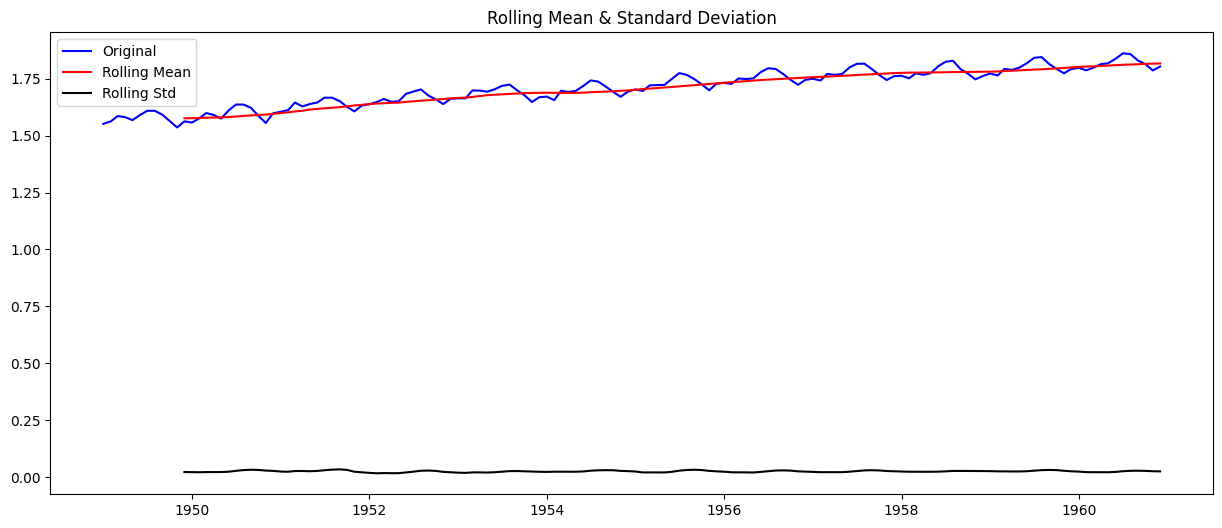

Results of Dickey-Fuller Test:
Test Statistic                  -2.156028
p-value                          0.222590
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [30]:
test_stationarity(ts_double_log['#Passengers'])

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


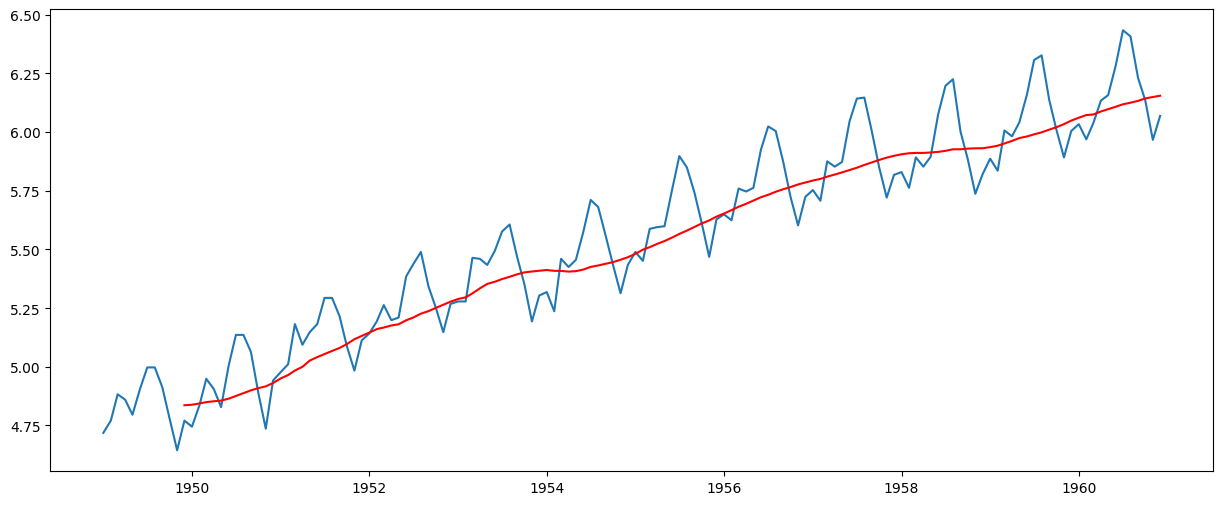

In [34]:
# Smoothing techniques
moving_avg=pd.Series(indexed_ts_df_log['#Passengers']).rolling(window=12).mean()
plt.plot(indexed_ts_df_log)
plt.plot(moving_avg,color='red')

ts_log_moving_avg_diff=indexed_ts_df_log['#Passengers']-moving_avg # Corrected line
ts_log_moving_avg_diff.head(5)
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head(5)

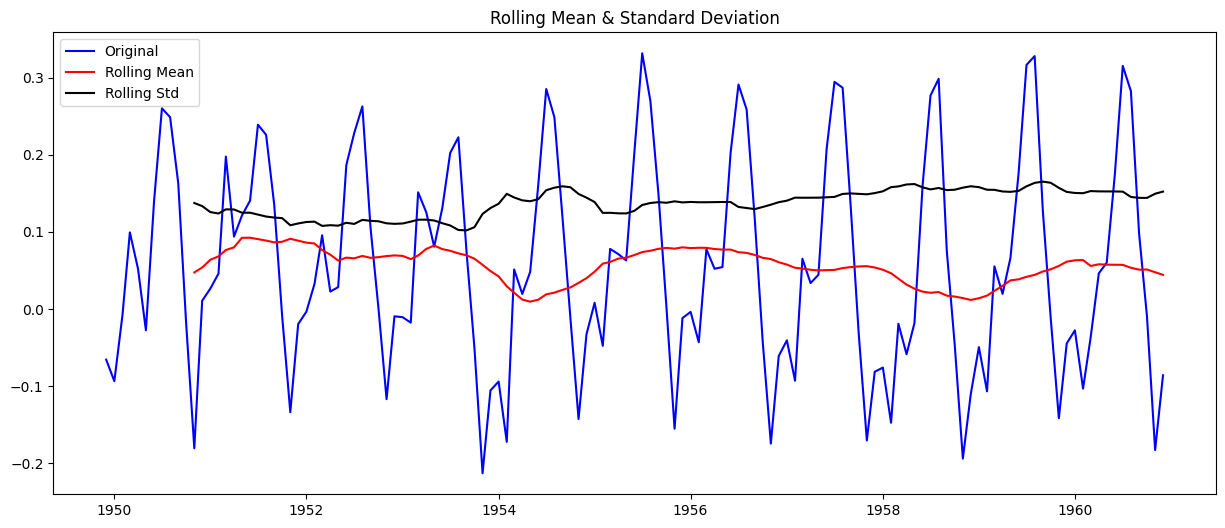

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [35]:
test_stationarity(ts_log_moving_avg_diff)

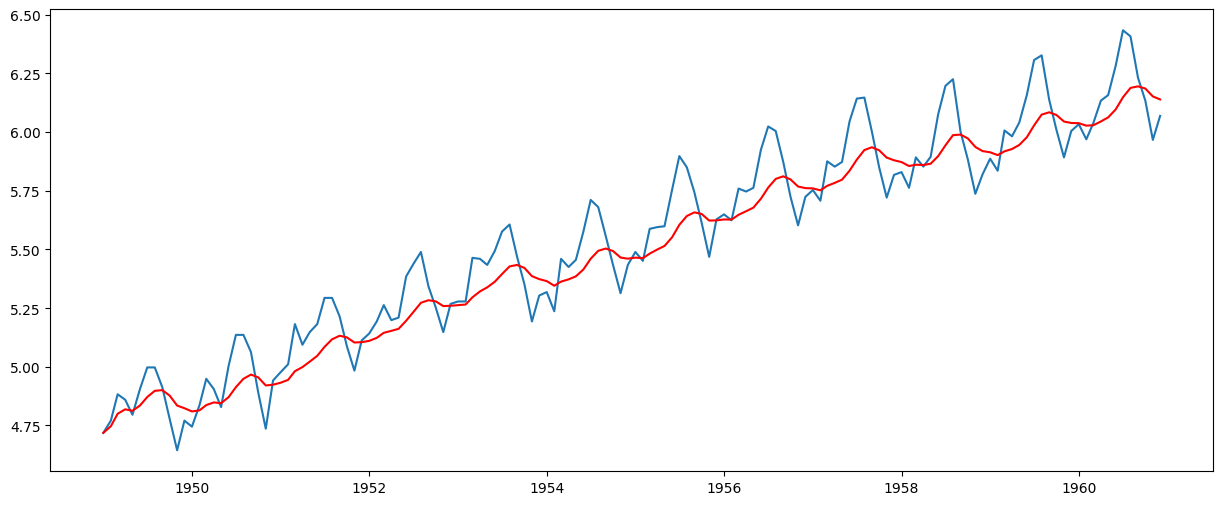

In [36]:
expwighted_avg=indexed_ts_df_log['#Passengers'].ewm(span=12).mean()
plt.plot(indexed_ts_df_log)
plt.plot(expwighted_avg,color='red')

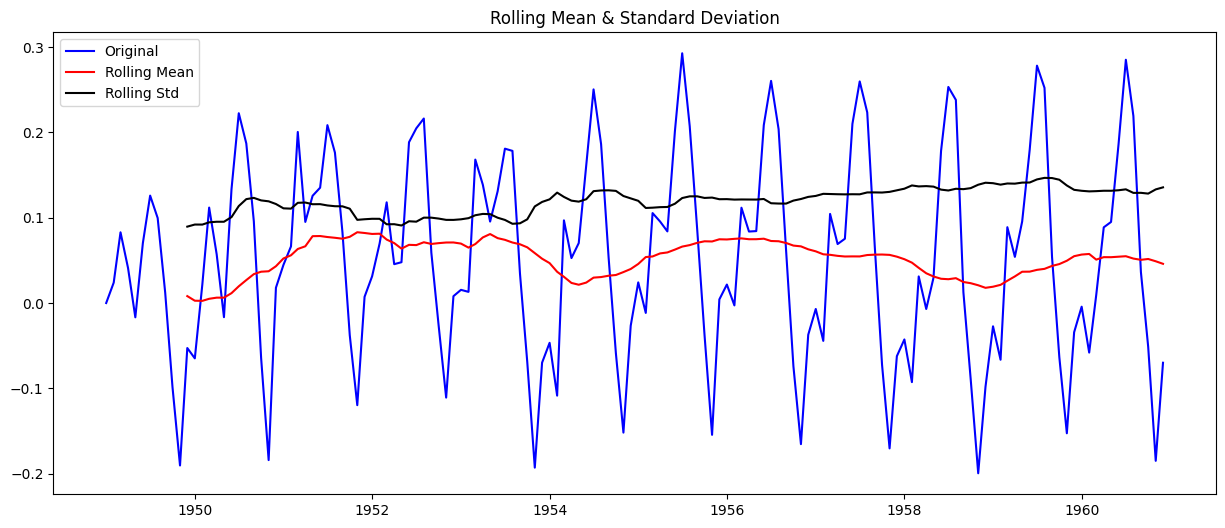

Results of Dickey-Fuller Test:
Test Statistic                  -3.310542
p-value                          0.014414
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [38]:
ts_log_emwa_diff=indexed_ts_df_log['#Passengers']-expwighted_avg
test_stationarity(ts_log_emwa_diff)

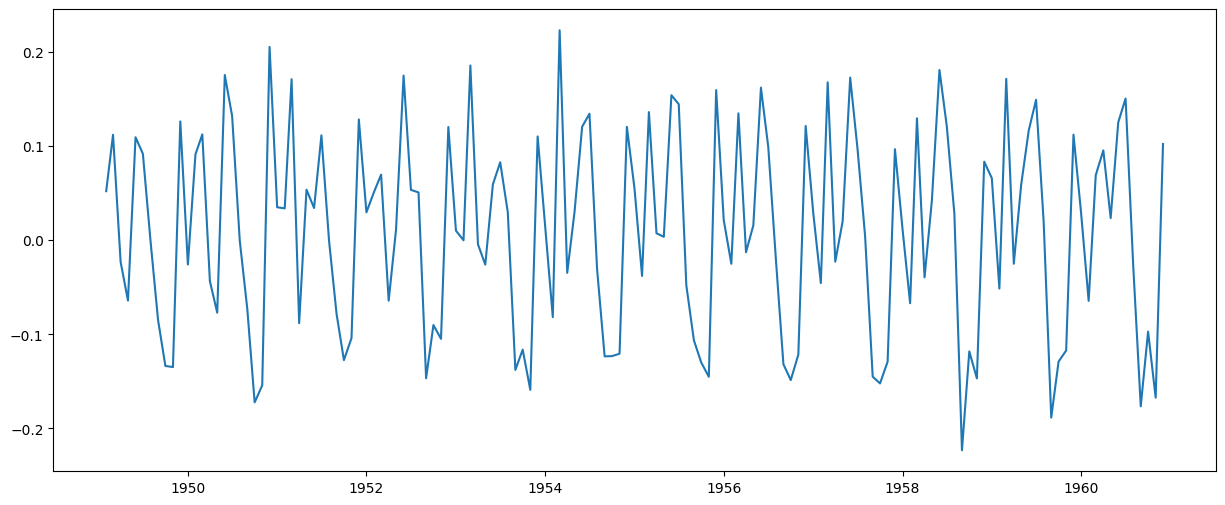

In [42]:
ts_log_diff=indexed_ts_df_log-indexed_ts_df_log.shift()
plt.plot(ts_log_diff)

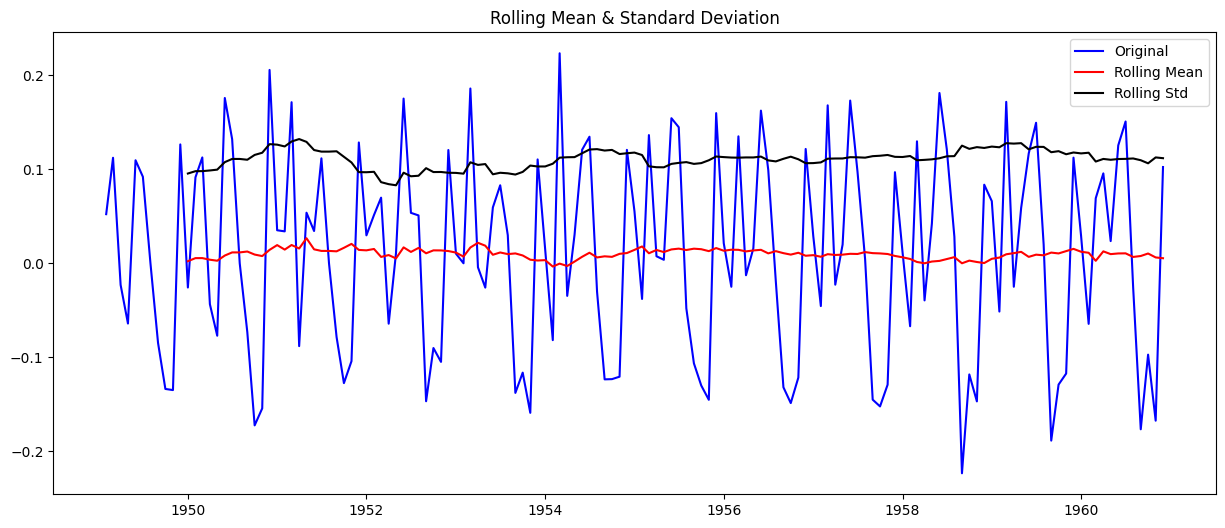

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [43]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff['#Passengers'])

# Decomposition

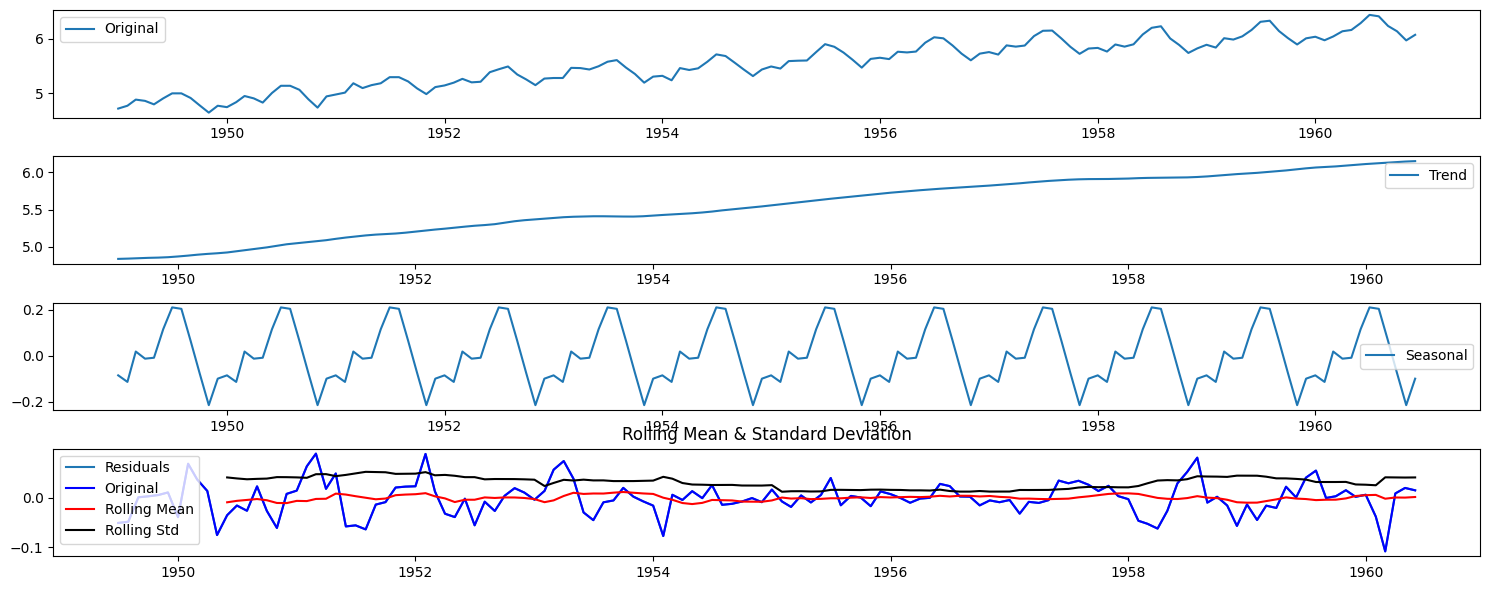

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(indexed_ts_df_log)
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid
plt.subplot(411)
plt.plot(indexed_ts_df_log,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

ts_log_decompose=residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)


In [45]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

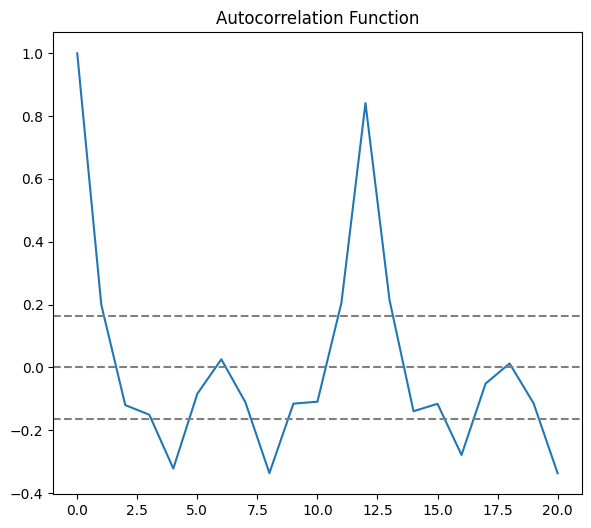

In [46]:
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

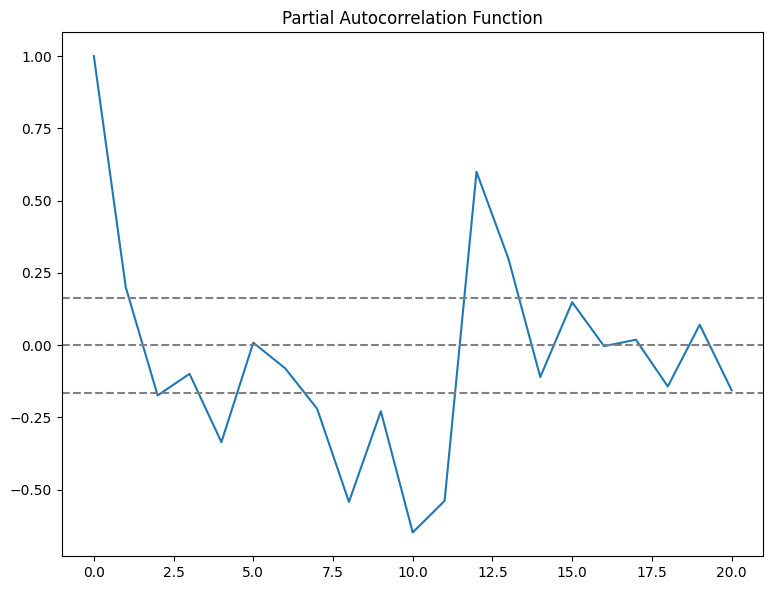

In [47]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [48]:
ts_values=indexed_ts_df_log.values

X = ts_values
size = int(len(X) * 0.667)
train, test = X[0:size], X[size:len(X)]

In [49]:
len(train),len(test)

(96, 48)

In [50]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from numpy.linalg import LinAlgError
import warnings
warnings.filterwarnings("ignore")

In [51]:
history = [x for x in train]
predictions = list()
#test.reset_index()
for t in range(len(test)):
    try:
        model = ARIMA(history, order=(4,1,2))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    except (ValueError, LinAlgError):
        pass
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
rmse = mean_squared_error(test, predictions)**0.5
print('Test MSE: %.3f' % rmse)


from math import sqrt
rms = sqrt(mean_squared_error(test, predictions))

predicted=5.774106, expected=5.752573
predicted=5.722130, expected=5.707110
predicted=5.731494, expected=5.874931
predicted=5.913134, expected=5.852202
predicted=5.815820, expected=5.872118
predicted=5.928926, expected=6.045005
predicted=6.023524, expected=6.142037
predicted=6.118480, expected=6.146329
predicted=6.173083, expected=6.001415
predicted=5.871771, expected=5.849325
predicted=5.793139, expected=5.720312
predicted=5.774684, expected=5.817111
predicted=5.861586, expected=5.828946
predicted=5.793781, expected=5.762051
predicted=5.788512, expected=5.891644
predicted=5.919776, expected=5.852202
predicted=5.808245, expected=5.894403
predicted=5.933466, expected=6.075346
predicted=6.068502, expected=6.196444
predicted=6.215272, expected=6.224558
predicted=6.257788, expected=6.001415
predicted=5.890733, expected=5.883322
predicted=5.858095, expected=5.736572
predicted=5.699365, expected=5.820083
predicted=5.928238, expected=5.886104
predicted=5.904793, expected=5.834811
predicted=5.

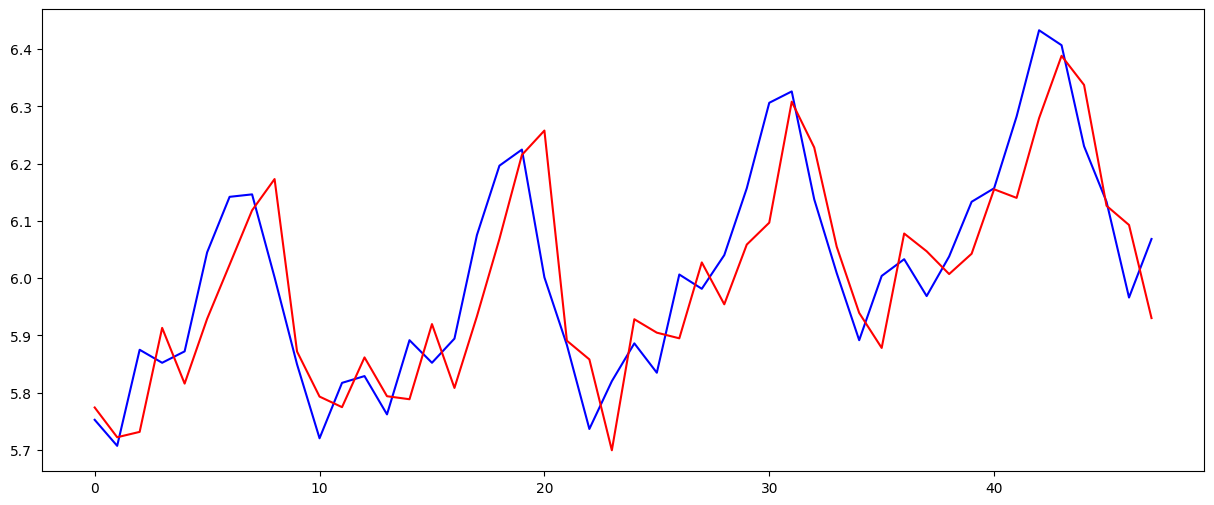

In [53]:
# plot
from matplotlib import pyplot
pyplot.plot(test, color = 'blue', label='test')
pyplot.plot(predictions, color='red', label='pred')
pyplot.show()

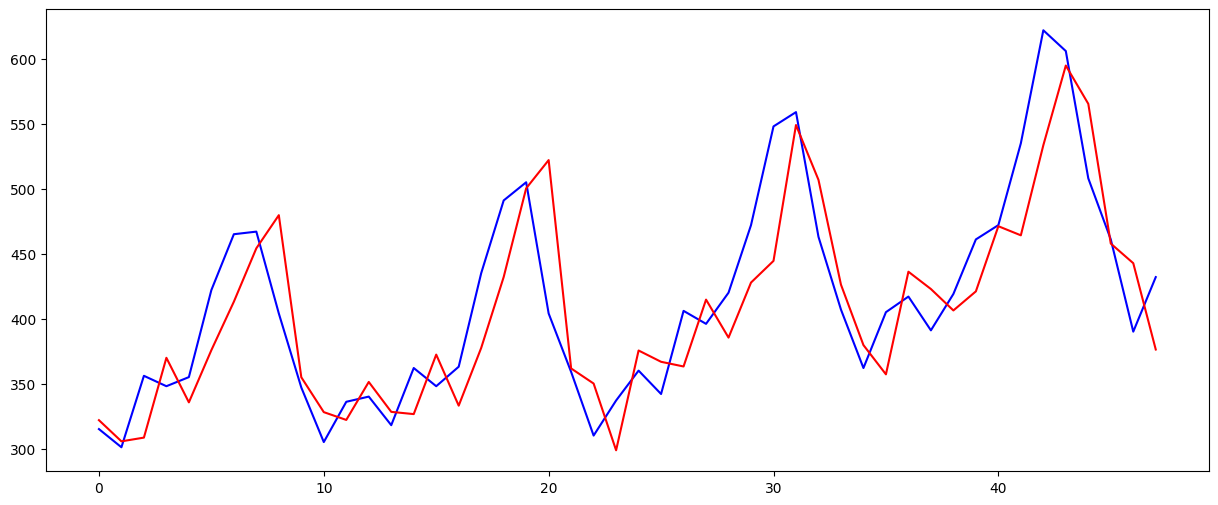

In [54]:
pyplot.plot(np.exp(test), color = 'blue', label='test')
pyplot.plot(np.exp(predictions), color='red', label='pred')
pyplot.show()

In [55]:
from math import sqrt
rms = sqrt(mean_squared_error(np.exp(test), np.exp(predictions)))
print('Mean Squarred Error: %.2f'% rms)

Mean Squarred Error: 42.99


# GRID SEARCH

In [56]:
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()
print("now =", now)
# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)

now = 2025-12-27 18:20:07.310123
date and time = 27/12/2025 18:20:07


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Define ranges for p, q, and d
p_values = [1,2,3,4,5,6]
d_values = [0,1,2]
q_values = [1,2,3,4,5,6]

best_rmse, best_p, best_d, best_q = np.inf, None, None, None
history = [x for x in train]
# make predictions
predictions = list()
# Perform grid search
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            try:
              for t in range(len(test)):
                # Fit the model
                model = ARIMA(history, order=order)
                model_fit = model.fit()
                yhat = model_fit.forecast()[0]
                predictions.append(yhat)
                history.append(test[t])

              # Calculate RMSE
              rmse = np.sqrt(mean_squared_error(test, predictions))

              # Update best RMSE and parameter values
              if rmse < best_rmse:
                    best_rmse, best_p, best_d, best_q = rmse, p, d, q

            except:
                continue

print(f"Best RMSE: {best_rmse}")
print(f"Best p: {best_p}")
print(f"Best d: {best_d}")
print(f"Best q: {best_q}")

from datetime import datetime

# datetime object containing current date and time
now = datetime.now()
print("now =", now)
# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)